In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.preprocessing import power_transform, LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_auc_score, roc_curve
from imblearn.over_sampling import RandomOverSampler

#### Lets import the dataset and do the analysis for the same

In [2]:
ds = pd.read_csv("~/Desktop/Practice/diabetes/diabetes.csv")

In [3]:
ds

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


from above we can see that there are 768 rows and 9 columns in the dataset

lets check the shape to know the exact count

In [4]:
rows, columns = ds.shape
print("From above we can figure out that there are {} rows and {} columns in the dataset" .format(rows,columns))

From above we can figure out that there are 768 rows and 9 columns in the dataset


In [5]:
ds.groupby(['Outcome']).mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
ds.axes

[RangeIndex(start=0, stop=768, step=1),
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
       dtype='object')]

In [8]:
ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
def outcome(values, props = ''):
    if values <= 0:
        color = 'red'
    else:
        color = 'green'
    return 'background-color: {}'.format(color)

In [10]:
ds.style.set_table_styles([
    {
        'selector' : 'td:hover',
        'props':[('background','#7cae00'),
                 ('color','white'),
                ('hover','green')]
    },
    #more styling
]).applymap(outcome, subset=['Outcome'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600000,0.627000,50,1
1,1,85,66,29,0,26.600000,0.351000,31,0
2,8,183,64,0,0,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,0,137,40,35,168,43.100000,2.288000,33,1
5,5,116,74,0,0,25.600000,0.201000,30,0
6,3,78,50,32,88,31.000000,0.248000,26,1
7,10,115,0,0,0,35.300000,0.134000,29,0
8,2,197,70,45,543,30.500000,0.158000,53,1
9,8,125,96,0,0,0.000000,0.232000,54,1


In [11]:
ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
ds.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

500 number of People doesn't have diabetes and 268 has diabetes


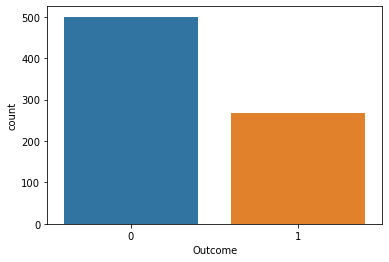

In [13]:
Non, Diabetes = ds['Outcome'].value_counts()
sns.countplot(ds['Outcome'])
print("{} number of People doesn't have diabetes and {} has diabetes".format(Non, Diabetes))

so from above we can see there are more data which doesn't have diabetes so we will do oversampling while creating model

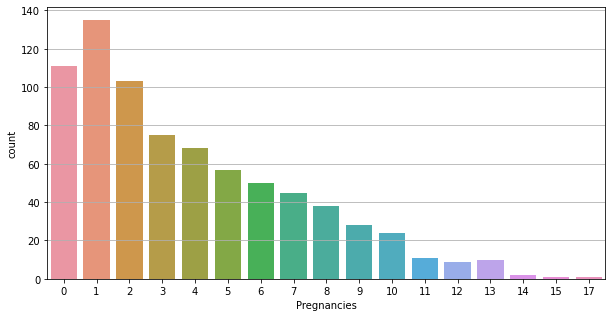

In [14]:
plt.figure(figsize=(10,5))
plt.grid(True)
sns.countplot(ds['Pregnancies'])

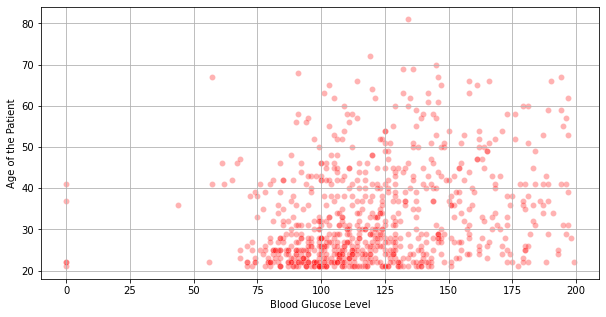

In [15]:
plt.figure(figsize=(10,5))
plt.xlabel("Blood Glucose Level")
plt.ylabel("Age of the Patient")
plt.grid(True)
sns.scatterplot(ds['Glucose'],ds['Age'], alpha=0.3, color='r')

from above we can see that there are some outliers in the glucose column as some points are at 0 and they are away from the Group of points

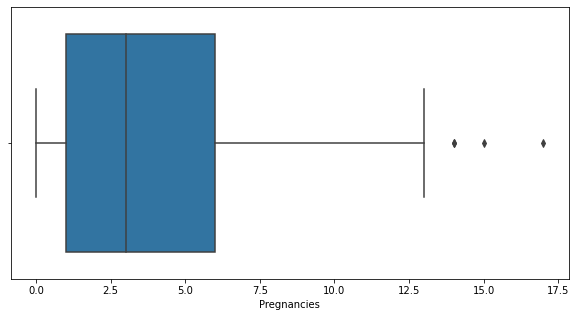

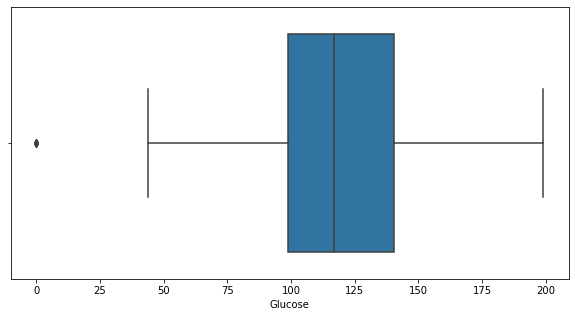

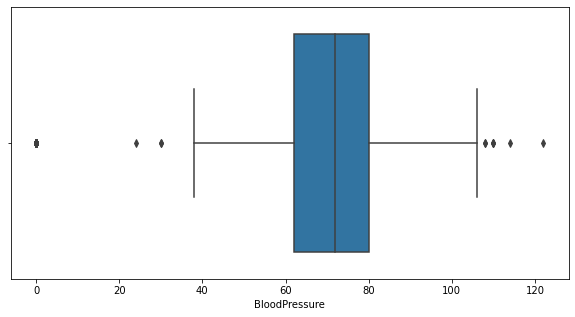

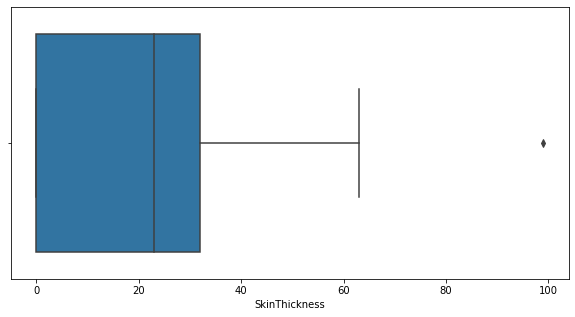

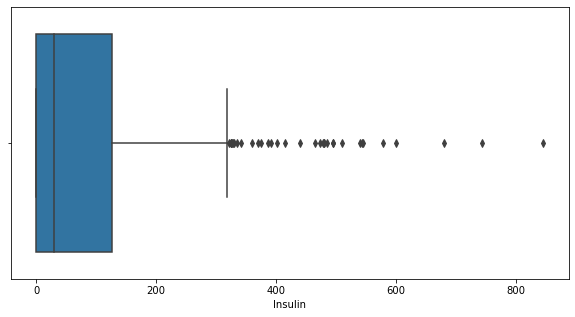

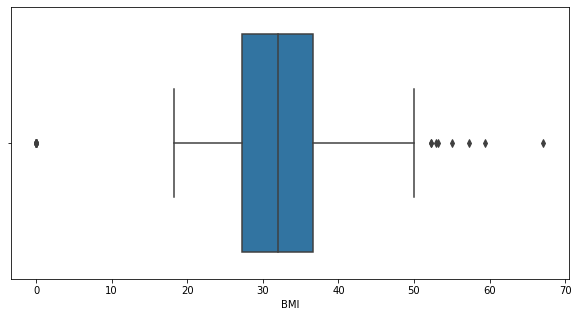

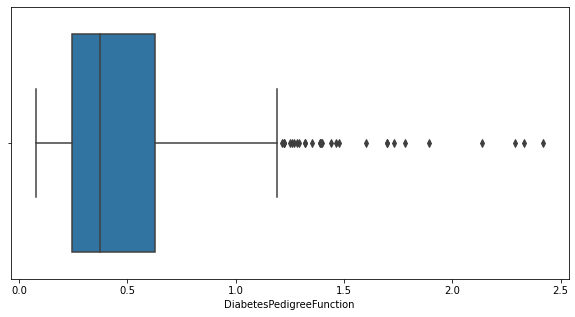

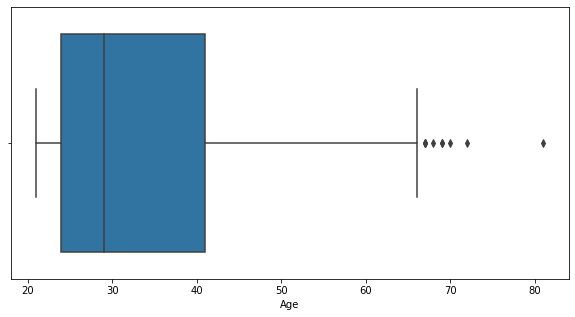

In [16]:
for i in ds.columns.drop('Outcome',1):
    plt.figure(figsize = (10,5))
    sns.boxplot(ds[i])

from above we can see that there are some outliers in the dataset lets remove it by using IQR

In [17]:
def remove_outliers(col):
    sorted(col)
    Q1, Q3 = np.percentile(col, [25,75])
    IQR = Q3 - Q1
    lower = Q1 - (1.5*IQR)
    upper = Q3 + (1.5*IQR)
    return lower, upper

In [18]:
for i in ds.columns.drop('Outcome',1):
    lower, upper = remove_outliers(ds[i])
    upr = np.where(ds[i] >= upper)
    for j in upr:
        ds[i][j] = upper
    lwr = np.where(ds[i] <= lower)
    for k in lwr:
        ds[i][k] = lower

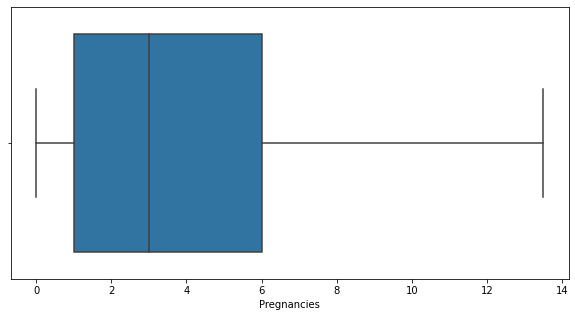

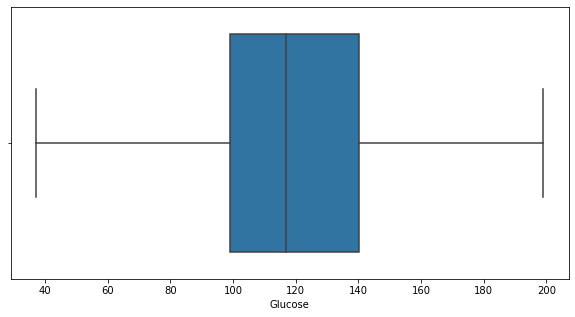

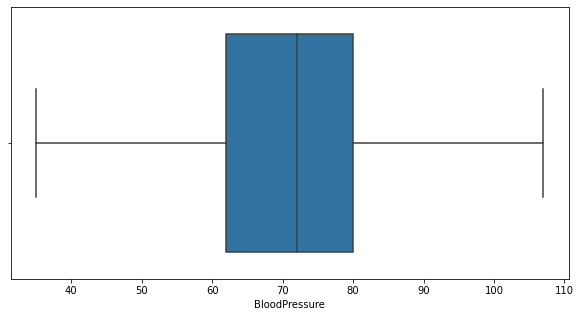

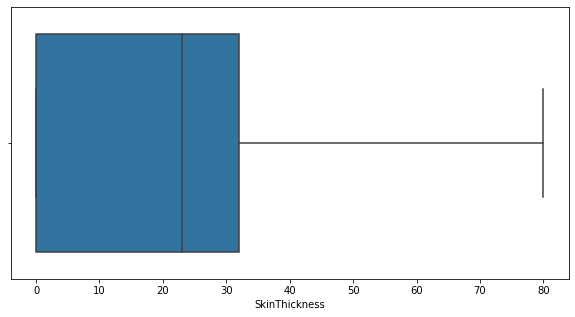

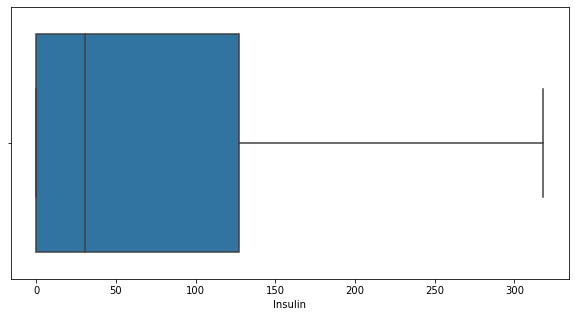

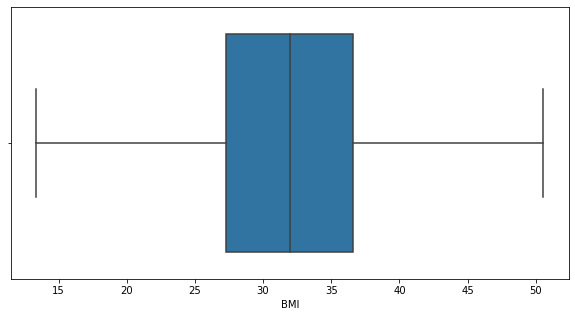

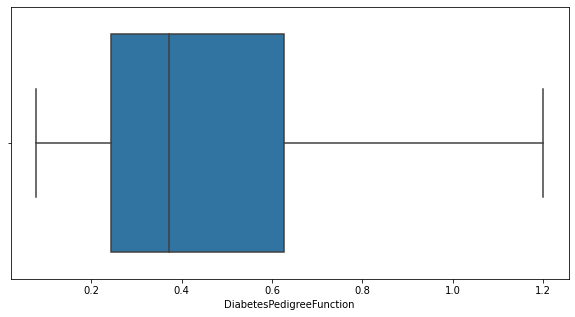

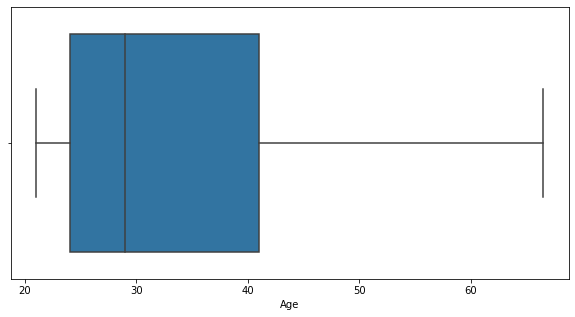

In [19]:
for i in ds.columns.drop('Outcome',1):
    plt.figure(figsize = (10,5))
    sns.boxplot(ds[i])

from above we can see that we have removed all the outliers from the dataset lets now see the skewness of the data

In [20]:
ds.skew()

Pregnancies                 0.853962
Glucose                     0.417946
BloodPressure              -0.406036
SkinThickness               0.026663
Insulin                     1.173898
BMI                         0.135809
DiabetesPedigreeFunction    1.024428
Age                         1.067170
Outcome                     0.635017
dtype: float64

from above we can see that the data are almost normaly distributed so lets visualize this using density function

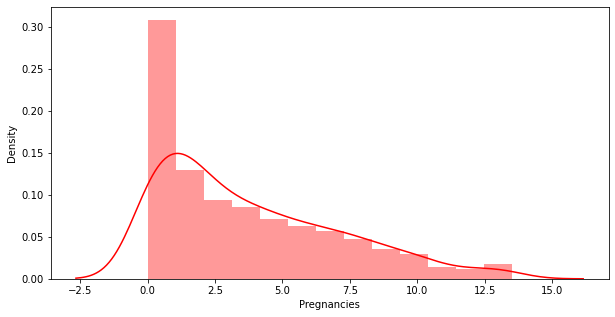

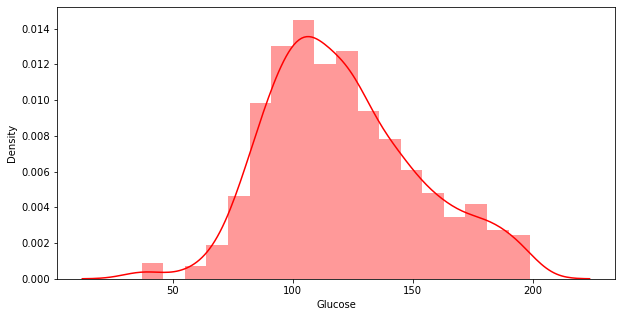

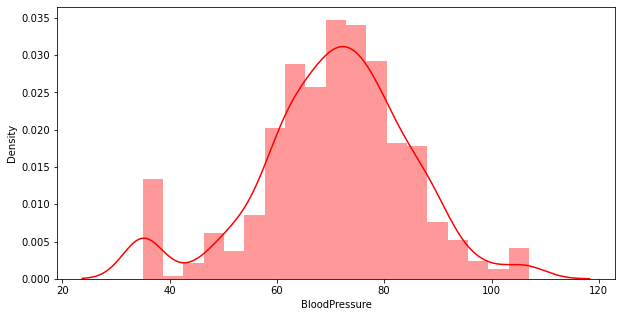

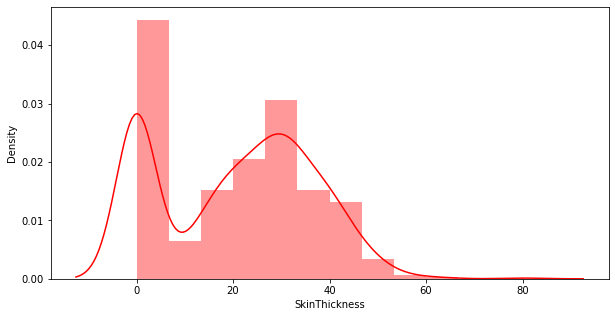

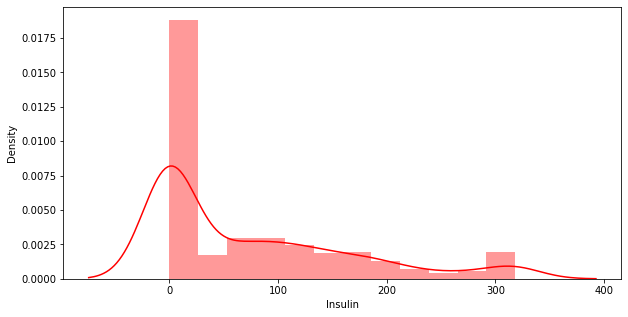

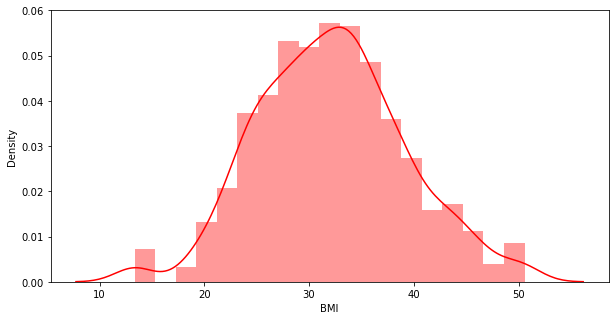

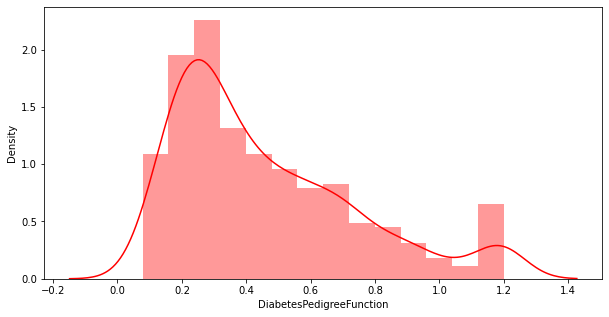

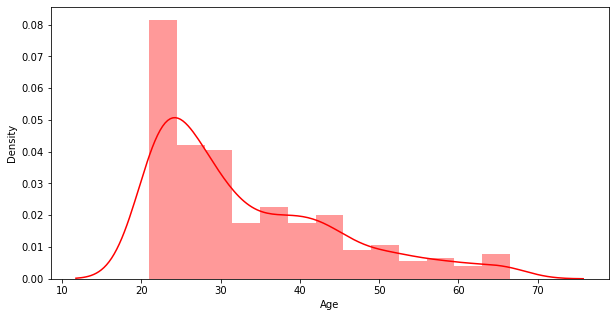

In [21]:
for i in ds.columns.drop('Outcome',1):
    plt.figure(figsize = (10,5))
    sns.distplot(ds[i], color='red')

lets fix the skewness of the data

In [22]:
for i in ds.columns.drop('Outcome', 1):
    if ds[i].skew() > 0.5:
        ds[i] = np.sqrt(ds[i])
    elif ds[i].skew() > -0.5:
        ds[i] = np.sqrt(ds[i])

In [23]:
ds.skew()

Pregnancies                -0.171703
Glucose                     0.029836
BloodPressure              -0.815108
SkinThickness              -0.581627
Insulin                     0.407759
BMI                        -0.240874
DiabetesPedigreeFunction    0.521500
Age                         0.814135
Outcome                     0.635017
dtype: float64

so from above we can see that wer have almost fixed the data as normalize data

lets build our model

In [24]:
X = ds.iloc[:,:-1]
Y = ds.iloc[:,-1]

In [25]:
ros = RandomOverSampler(sampling_strategy='minority')

In [26]:
Xnew, Ynew = ros.fit_resample(X, Y)

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(Xnew, Ynew, test_size=0.2, random_state=42)

In [46]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predlr = lr.predict(X_test)
print(accuracy_score(Y_test, pred))
print(classification_report(Y_test, pred))

0.795
              precision    recall  f1-score   support

           0       0.85      0.72      0.78        99
           1       0.76      0.87      0.81       101

    accuracy                           0.80       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.80      0.79       200



In [47]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
predrfc = rfc.predict(X_test)
print(accuracy_score(Y_test, pred))
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))

0.795
[[71 28]
 [13 88]]
              precision    recall  f1-score   support

           0       0.85      0.72      0.78        99
           1       0.76      0.87      0.81       101

    accuracy                           0.80       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.80      0.79       200



In [48]:
adb = AdaBoostClassifier()
adb.fit(X_train, Y_train)
predadb = adb.predict(X_test)
print(accuracy_score(Y_test, pred))
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))

0.795
[[71 28]
 [13 88]]
              precision    recall  f1-score   support

           0       0.85      0.72      0.78        99
           1       0.76      0.87      0.81       101

    accuracy                           0.80       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.80      0.79       200



In [49]:
xgb = XGBClassifier(verbosity = 0)
xgb.fit(X_train, Y_train)
predxgb = xgb.predict(X_test)
print(accuracy_score(Y_test, pred))
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))

0.795
[[71 28]
 [13 88]]
              precision    recall  f1-score   support

           0       0.85      0.72      0.78        99
           1       0.76      0.87      0.81       101

    accuracy                           0.80       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.80      0.79       200



In [50]:
xgbrfc = XGBRFClassifier()
xgbrfc.fit(X_train, Y_train)
predxgbrfc = xgbrfc.predict(X_test)
print(accuracy_score(Y_test, pred))
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))

0.795
[[71 28]
 [13 88]]
              precision    recall  f1-score   support

           0       0.85      0.72      0.78        99
           1       0.76      0.87      0.81       101

    accuracy                           0.80       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.80      0.79       200



lets see auc roc score for the same

In [54]:
fpr, tpr, threshold = roc_curve(Y_test, predlr)
roc_auc1 = auc(fpr, tpr)
fpr1, tpr1, threshold = roc_curve(Y_test, predrfc)
roc_auc2 = auc(fpr1, tpr1)
fpr2, tpr2, threshold = roc_curve(Y_test, predadb)
roc_auc3 = auc(fpr2, tpr2)
fpr3, tpr3, threshold = roc_curve(Y_test, predxgb)
roc_auc4 = auc(fpr3, tpr3)
fpr4, tpr4, threshold = roc_curve(Y_test, predxgbrfc)
roc_auc5 = auc(fpr4, tpr4)

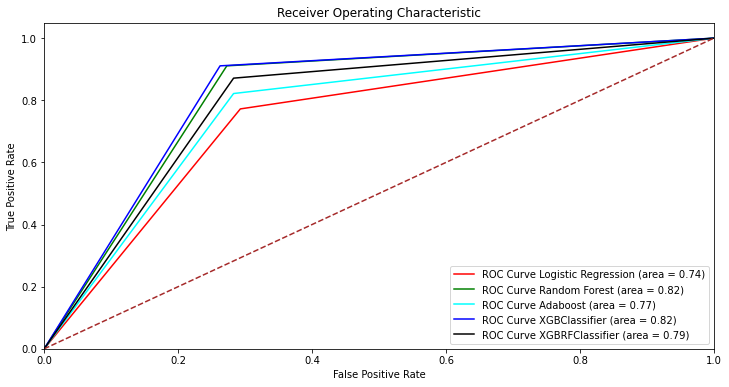

In [57]:
plt.figure(figsize = (12,6))
plt.plot(fpr, tpr, color='red', label = "ROC Curve Logistic Regression (area = %0.2f)" %roc_auc1)
plt.plot(fpr1, tpr1, color='green', label = "ROC Curve Random Forest (area = %0.2f)" %roc_auc2)
plt.plot(fpr2, tpr2, color='cyan', label = "ROC Curve Adaboost (area = %0.2f)" %roc_auc3)
plt.plot(fpr3, tpr3, color='blue', label = "ROC Curve XGBClassifier (area = %0.2f)" %roc_auc4)
plt.plot(fpr4, tpr4, color='black', label = "ROC Curve XGBRFClassifier (area = %0.2f)" %roc_auc5)
plt.plot([0,1],[0,1], color='brown', linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")